# Unnormalized log transformed: breast, prostate, thyroid

The unnormalized and log transformed breast, prostate and thyroid

In [1]:
from train_RNA_ResNet import ResNet
from keras import callbacks as cb
from Calibration_Util import FileIO as io
import os
import numpy as np
import pandas as pd

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/ubuntu/anaconda3/envs/t

In [2]:
rnaNet = ResNet()

# GTEX as source and TCGA as target
source_file = 'unnorm-log-20PC-GTEX-breast-prostate-thyroid.csv'
target_file = 'unnorm-log-20PC-TCGA-breast-prostate-thyroid.csv'
source_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + source_file)
target_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + target_file)

# Make GTEX target and TCGA source
# target_file = 'unnorm-log-20PC-GTEX-breast-prostate-thyroid.csv'
# source_file = 'unnorm-log-20PC-TCGA-breast-prostate-thyroid.csv'
# source_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + source_file)
# target_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + target_file)

rnaNet.load_data(source_path=source_path,
                target_path=target_path)

In [3]:
print("\ngtex = source shape = " + str(rnaNet.source.shape))
print("tcga = target shape = " + str(rnaNet.target.shape))


gtex = source shape = (636, 20)
tcga = target shape = (211, 20)


In [4]:
import MultiMMD as m

source = rnaNet.source_df.sort_values(['tissue'])
target = rnaNet.target_df.sort_values(['tissue'])
source_counts = source['tissue'].value_counts().sort_index()
target_counts = target['tissue'].value_counts().sort_index()
source_ranges = m.calculate_ranges(source_counts)
target_ranges = m.calculate_ranges(target_counts)

df_list = []
num_tissues = source_counts.index.shape[0]
for t in range(num_tissues):
    low = source_ranges[t, 0]
    high = source_ranges[t, 1]
    
    subsample = source.iloc[low:high, :].sample(n = target_counts[source_counts.index[t]])
    df_list.append(subsample)
    
s = pd.concat(df_list)
rnaNet.source_df = s
rnaNet.source = s.loc[:, "PC1":].values

tissue = breast, low = 0, high = 212
tissue = prostate, low = 212, high = 318
tissue = thyroid, low = 318, high = 636
tissue = breast, low = 0, high = 110
tissue = prostate, low = 110, high = 158
tissue = thyroid, low = 158, high = 211


In [5]:
rnaNet.init_res_net()

setting scales using KNN
[25.105406745217579, 50.210813490435157, 100.42162698087031]
setting all scale weights to 1


In [6]:
callbacks=[rnaNet.lrate, cb.EarlyStopping(monitor='val_loss', patience=100, mode='auto')]
rnaNet.train(epochs=1000, callbacks=callbacks, batch_size=50)

Train on 189 samples, validate on 22 samples
Epoch 1/1000
189/189 [==============================] - 0s 2ms/step - loss: 1.1179 - val_loss: 1.8775
Epoch 2/1000
189/189 [==============================] - 0s 222us/step - loss: 1.1000 - val_loss: 1.8644
Epoch 3/1000
189/189 [==============================] - 0s 220us/step - loss: 1.1002 - val_loss: 1.8572
Epoch 4/1000
189/189 [==============================] - 0s 224us/step - loss: 1.0768 - val_loss: 1.8796
Epoch 5/1000
189/189 [==============================] - 0s 219us/step - loss: 1.0453 - val_loss: 1.9019
Epoch 6/1000
189/189 [==============================] - 0s 225us/step - loss: 1.0127 - val_loss: 1.8790
Epoch 7/1000
189/189 [==============================] - 0s 218us/step - loss: 0.9749 - val_loss: 1.8796
Epoch 8/1000
189/189 [==============================] - 0s 217us/step - loss: 0.9547 - val_loss: 1.8964
Epoch 9/1000
189/189 [==============================] - 0s 224us/step - loss: 0.9232 - val_loss: 1.8483
Epoch 10/1000
189/189

189/189 [==============================] - 0s 220us/step - loss: 0.7078 - val_loss: 1.5094
Epoch 79/1000
189/189 [==============================] - 0s 223us/step - loss: 0.7208 - val_loss: 1.6144
Epoch 80/1000
189/189 [==============================] - 0s 229us/step - loss: 0.7250 - val_loss: 1.5875
Epoch 81/1000
189/189 [==============================] - 0s 228us/step - loss: 0.7154 - val_loss: 1.5895
Epoch 82/1000
189/189 [==============================] - 0s 221us/step - loss: 0.7121 - val_loss: 1.5705
Epoch 83/1000
189/189 [==============================] - 0s 230us/step - loss: 0.7196 - val_loss: 1.5640
Epoch 84/1000
189/189 [==============================] - 0s 226us/step - loss: 0.7008 - val_loss: 1.5346
Epoch 85/1000
189/189 [==============================] - 0s 222us/step - loss: 0.6935 - val_loss: 1.5863
Epoch 86/1000
189/189 [==============================] - 0s 224us/step - loss: 0.7041 - val_loss: 1.5692
Epoch 87/1000
189/189 [==============================] - 0s 217us/ste

189/189 [==============================] - 0s 211us/step - loss: 0.7099 - val_loss: 1.5730
Epoch 156/1000
189/189 [==============================] - 0s 235us/step - loss: 0.6981 - val_loss: 1.5898
Epoch 157/1000
189/189 [==============================] - 0s 223us/step - loss: 0.7030 - val_loss: 1.5535
Epoch 158/1000
189/189 [==============================] - 0s 226us/step - loss: 0.6822 - val_loss: 1.6098
Epoch 159/1000
189/189 [==============================] - 0s 215us/step - loss: 0.6969 - val_loss: 1.5427
Epoch 160/1000
189/189 [==============================] - 0s 220us/step - loss: 0.6801 - val_loss: 1.5709
Epoch 161/1000
189/189 [==============================] - 0s 217us/step - loss: 0.6819 - val_loss: 1.5709
Epoch 162/1000
189/189 [==============================] - 0s 221us/step - loss: 0.6756 - val_loss: 1.5885
Epoch 163/1000
189/189 [==============================] - 0s 219us/step - loss: 0.6923 - val_loss: 1.5444
Epoch 164/1000
189/189 [==============================] - 0s 

In [7]:
rnaNet.source_df = source
rnaNet.source = source.loc[:, "PC1":].values

In [8]:
from plots import scatter_plot, heatmap

rnaNet.predict()
rnaNet.pca()
%matplotlib inline

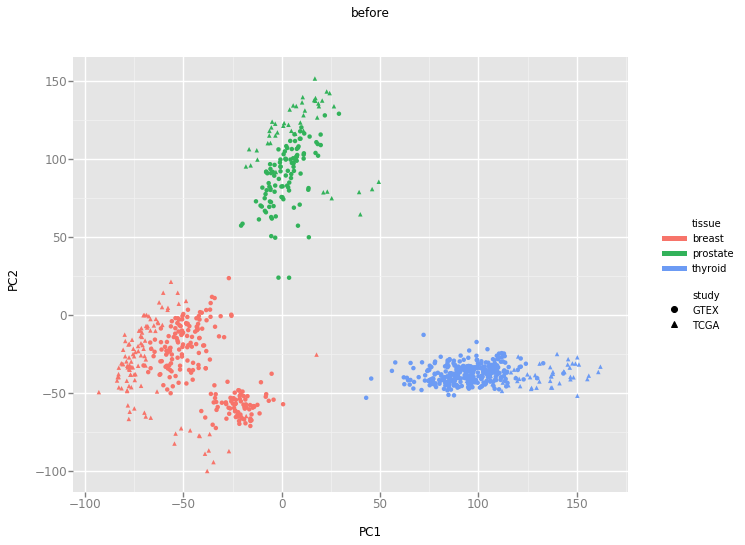

<ggplot: (-9223363289426280234)>


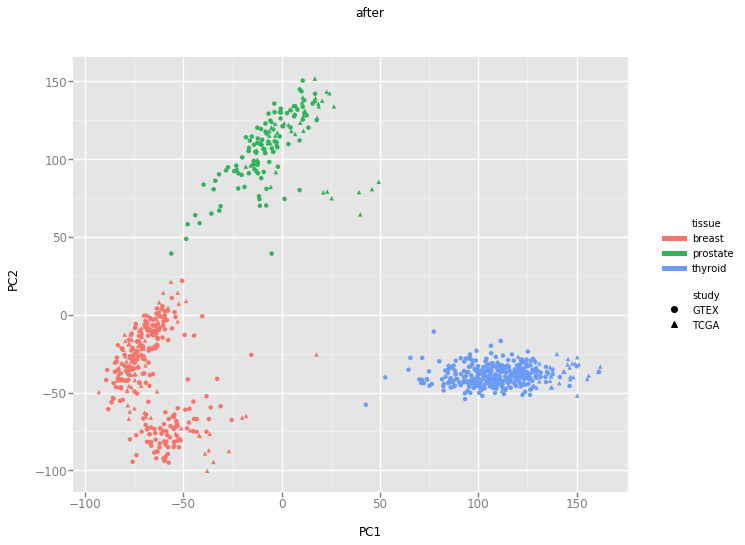

<ggplot: (-9223363289428164650)>


In [9]:
scatter_plot(rnaNet.source_pca_df, rnaNet.target_pca_df, title="before")
scatter_plot(rnaNet.calibrated_source_pca_df, rnaNet.target_pca_df, title="after")

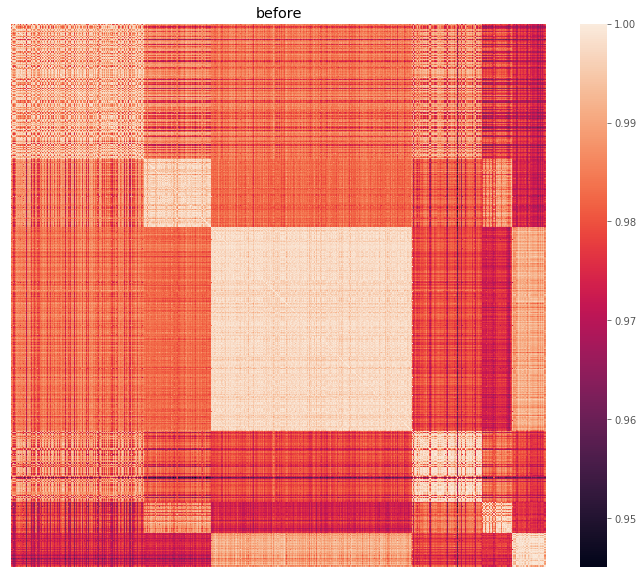

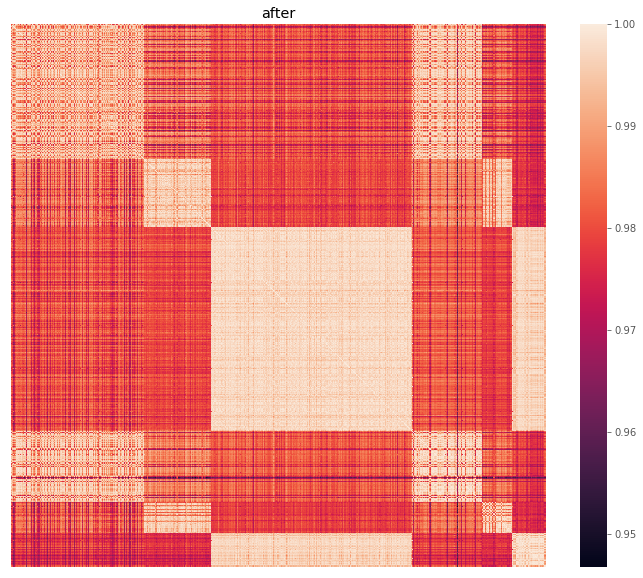

In [10]:
heatmap(rnaNet.source_df, rnaNet.target_df, title="before")
heatmap(rnaNet.calibrated_source_df, rnaNet.target_df, title="after")

In [11]:
import CostFunctions as cf
from keras import backend as K

source = rnaNet.source.astype('float32')
target = rnaNet.target.astype('float32')
calibrated_source = rnaNet.calibrated_source.astype('float32')

mmd = cf.MMD(source, target, MMDTargetSampleSize=target.shape[0], n_neighbors=10)
mmd_before = K.eval(mmd.cost(source, target))
mmd_after = K.eval(mmd.cost(calibrated_source, target))

print("MMD before: %0.10f" % mmd_before)
print("MMD after: %0.10f" % mmd_after)

setting scales using KNN
[20.647118680675185, 41.294237361350369, 82.588474722700738]
setting all scale weights to 1
MMD before: 0.9573588371
MMD after: 0.6257121563


In [ ]:
save_file = 'calibrated-unnorm-log-20PC-GTEX-breast-prostate-thyroid.csv'
save_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + save_file)

rnaNet.save_calibrated(path=save_path)